In [1]:
import pandas as pd
import matplotlib
from  matplotlib import pyplot as plt
from math import log2,log10,ceil

In [2]:
matplotlib.rcParams["font.size"] = 20

def get_ax():
    fig, ax = plt.subplots(figsize=(8,6))
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.set_xlim(1, 10)
    return ax

def scale_ax():
    ax = get_ax()
    ax.set_xlabel("N (data size)")
    ax.set_ylabel("Steps")
    return ax

def plot_func(ax, f, C=1, color="k", label="work"):
    start = ax.get_xlim()[0]
    width = ax.get_xlim()[1] - ax.get_xlim()[0]
    s = pd.Series([],dtype=float)
    for i in range(100):
        N = start + width * (i+1)/100
        s[N] = eval(f)
    s.sort_index().plot(ax=ax, color=color, linewidth=3, label=label)
    plt.text(s.index[-1], s.iloc[-1], f, verticalalignment='center')
    
def upper_bound(ax, order, C=1, minN=None):
    f = order
    if C != 1:
        f = "C * (%s)" % order
    plot_func(ax, f, C=C, color="r", label="upper bound")
    if minN != None:
        ax.axvspan(minN, ax.get_xlim()[1], color='0.85')
    ax.legend(frameon=False)


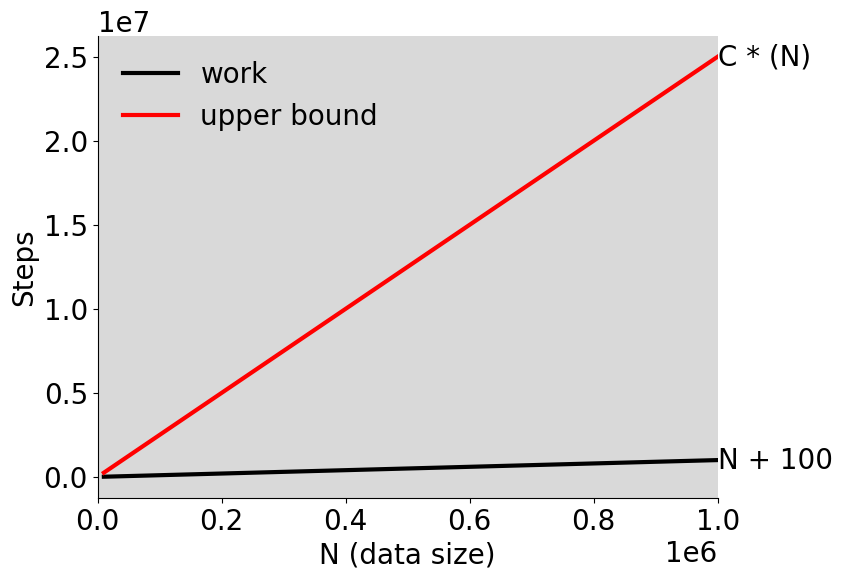

In [3]:
ax = scale_ax()
ax.set_xlim(0, 1e6) # TODO: change upper bound
plot_func(ax, "N + 100")

upper_bound(ax, order="N",C=25,minN=6) # TODO: pass C and minN


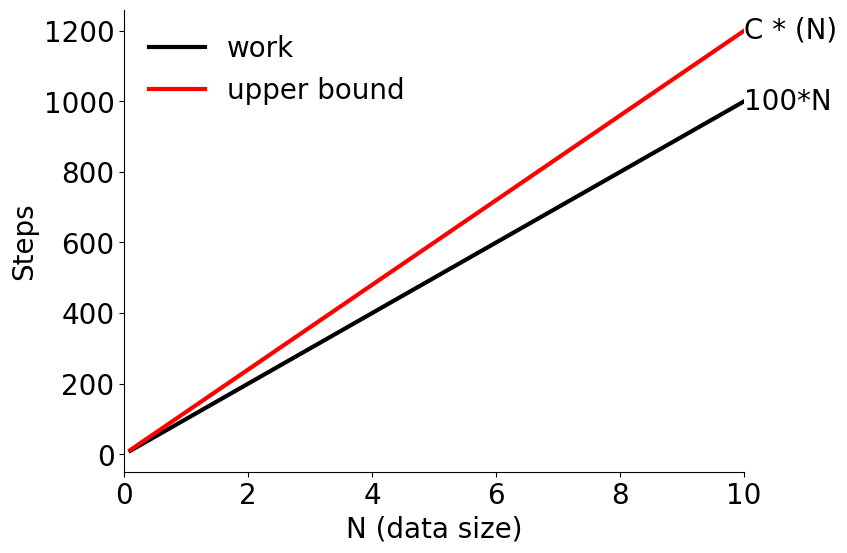

In [4]:
ax = scale_ax()
ax.set_xlim(0, 10)
plot_func(ax, "100*N")

upper_bound(ax, order="N",C=120)
# we don' need to choose a minN value because choosing a right C value will make the red line above the black line for all N values


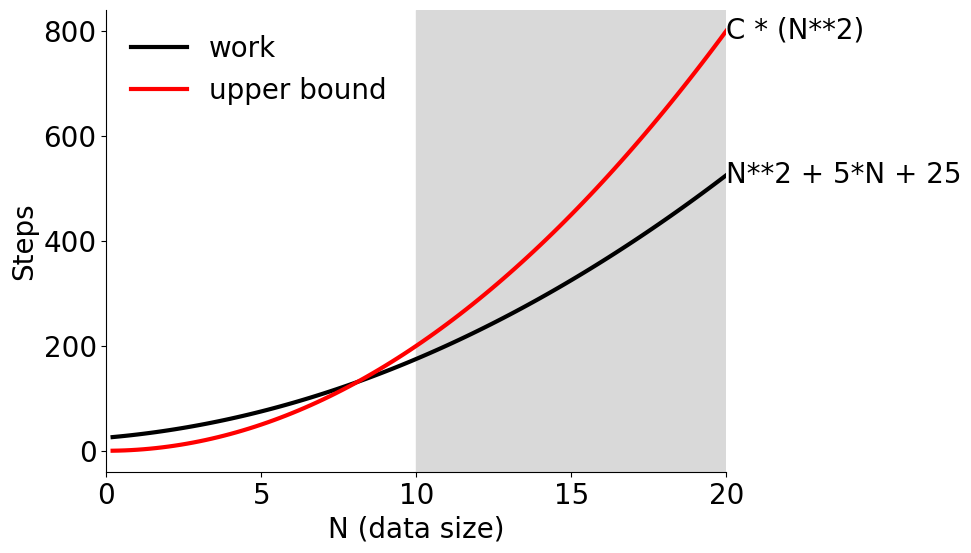

In [5]:
ax = scale_ax()
ax.set_xlim(0, 20)
plot_func(ax, "N**2 + 5*N + 25",1e2)

upper_bound(ax, order="N**2",C=2,minN=10)
# we chose the values of C=2, N>=10


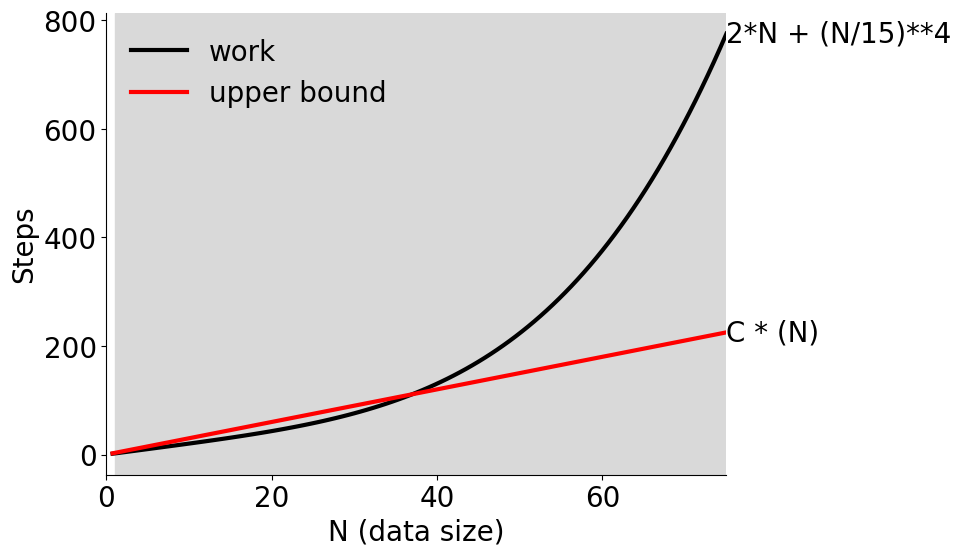

In [6]:
ax = scale_ax()
ax.set_xlim(0, 75)
plot_func(ax, "2*N + (N/15)**4")

upper_bound(ax, order="N",C=3,minN=1)
# f(n) has n^4 order of growth


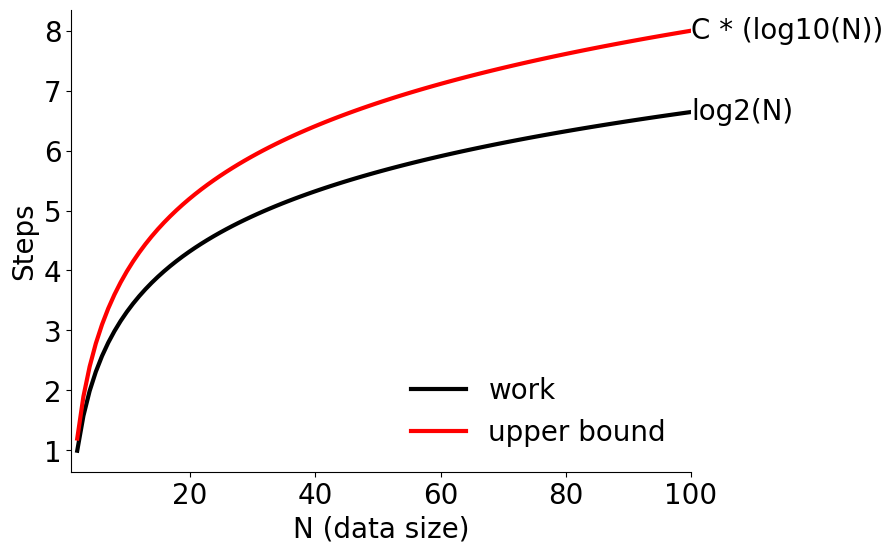

In [7]:
ax = scale_ax()
ax.set_xlim(1, 100)
plot_func(ax, "log2(N)")

upper_bound(ax, order="log10(N)",C=4)
#log2(1)~3.5 so we use C=4 as we need c>=log2(10)


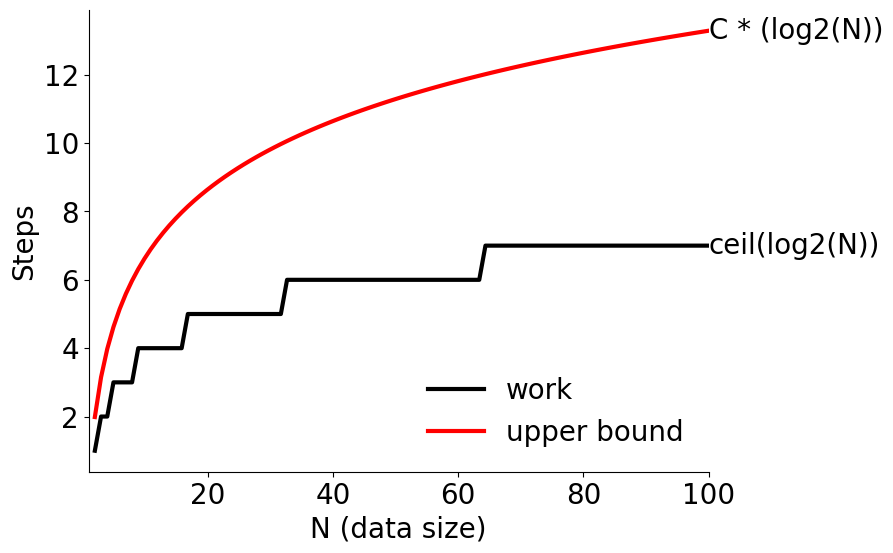

In [8]:
ax = scale_ax()
ax.set_xlim(1, 100)
plot_func(ax, "ceil(log2(N))")

upper_bound(ax, order="log2(N)",C=2)


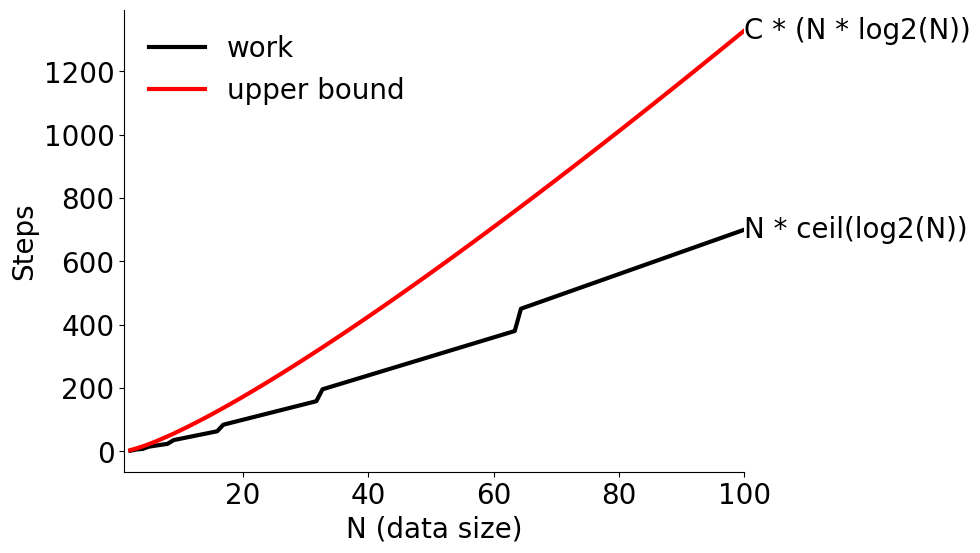

In [9]:
ax = scale_ax()
ax.set_xlim(1, 100)
plot_func(ax, "N * ceil(log2(N))")

upper_bound(ax, order="N * log2(N)",C=2)


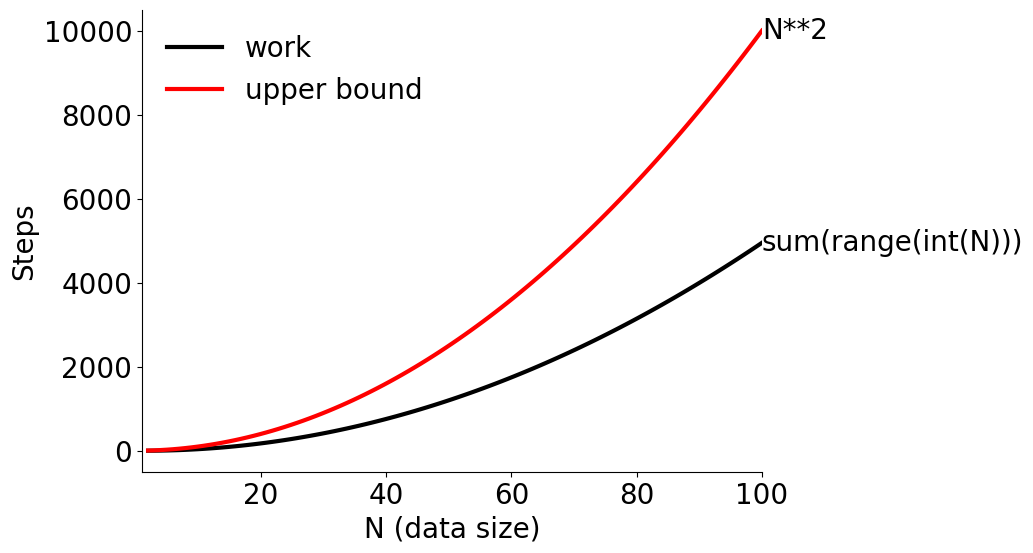

In [10]:
ax = scale_ax()
ax.set_xlim(1, 100)
plot_func(ax, "sum(range(int(N)))")

upper_bound(ax, order="N**2")
#c=1 also works for any value of N because the sum is (n)(n-1)/2


In [11]:
f = open("file.txt","w")
f.write("line1")
f.write("line2")
f.close()


In [20]:
f = open("dog.json")
input1 = f.read()
input2 = f.read()
f.close()


FileNotFoundError: [Errno 2] No such file or directory: 'dog.json'

In [13]:
import pandas as pd
from zipfile import ZipFile, ZIP_DEFLATED
from io import TextIOWrapper

with open("hello.txt", "w") as f:
    f.write("hello world")

with ZipFile("example.zip", "w", compression=ZIP_DEFLATED) as zf:
    with zf.open("hello.txt", "w") as f:
        f.write(bytes("hello world", "utf-8"))
    with zf.open("ha.txt", "w") as f:
        f.write(bytes("ha"*10000, "utf-8"))
    with zf.open("bugs.csv", "w") as f:
        pd.DataFrame([["Mon",7], ["Tue",4], ["Wed",3], ["Thu",6], ["Fri",9]],
                     columns=["day", "bugs"]).to_csv(TextIOWrapper(f), index=False)


In [14]:
with ZipFile('example.zip') as zf:
    for info in zf.infolist():
        orig_mb = info.file_size / (1024**2) # there are 1024**2 bytes in a MB
        ratio = info.file_size / info.compress_size
        s = "file {name:s}, {mb:.3f} MB (uncompressed), {ratio:.1f} compression ratio"
        print(s.format(name=info.filename, mb=orig_mb, ratio=ratio))


file hello.txt, 0.000 MB (uncompressed), 0.8 compression ratio
file ha.txt, 0.019 MB (uncompressed), 512.8 compression ratio
file bugs.csv, 0.000 MB (uncompressed), 1.0 compression ratio


In [15]:
with open("hello.txt", "r") as f:
    data1 = f.read()

with open("hello.txt", "rb") as f:
    data2 = f.read()

print(type(data1), type(data2))


<class 'str'> <class 'bytes'>


In [16]:
from io import TextIOWrapper
with open("hello.txt", "rb") as f:
    tio = TextIOWrapper(f)
    data3 = tio.read()
print(type(data3))


<class 'str'>


In [17]:
with ZipFile('example.zip') as zf:
    with zf.open("hello.txt", "r") as f:
        print(f.read())


b'hello world'


In [18]:
with ZipFile('example.zip') as zf:
    with zf.open("hello.txt", "r") as f:
        tio = TextIOWrapper(f)
        print(tio.read())


hello world


In [19]:
with ZipFile('example.zip') as zf:
    with zf.open("bugs.csv") as f:
         df = pd.read_csv(f)
df


,day,bugs
0,Mon,7
1,Tue,4
2,Wed,3
3,Thu,6
4,Fri,9
